# Importing Libraries and Datasets

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings("ignore")


In [2]:
#read the csv file
hr = pd.read_csv("HR-Employee-Attrition.csv")
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
#examine the information 
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#display the column names
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#display the shape of hr dataset
hr.shape

(1470, 35)

 #### There are 1470 rows and 35 columns

# Identifying The Type of Problem(Regression/Classification)

In [6]:
#examine the data type of columns
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

#### observation:
- There are 9 categorical column and 26 numerical columns

In [7]:
hr_columns = ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']
for value in hr_columns:
    print(hr[value].unique())

[41 49 37 33 27 32 59 30 38 36 35 29 31 34 28 22 53 24 21 42 44 46 39 43
 50 26 48 55 45 56 23 51 40 54 58 20 25 19 57 52 47 18 60]
['Yes' 'No']
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[1102  279 1373 1392  591 1005 1324 1358  216 1299  809  153  670 1346
  103 1389  334 1123 1219  371  673 1218  419  391  699 1282 1125  691
  477  705  924 1459  125  895  813 1273  869  890  852 1141  464 1240
 1357  994  721 1360 1065  408 1211 1229  626 1434 1488 1097 1443  515
  853 1142  655 1115  427  653  989 1435 1223  836 1195 1339  664  318
 1225 1328 1082  548  132  746  776  193  397  945 1214  111  573 1153
 1400  541  432  288  669  530  632 1334  638 1093 1217 1353  120  682
  489  807  827  871  665 1040 1420  240 1280  534 1456  658  142 1127
 1031 1189 1354 1467  922  394 1312  750  441  684  249  841  147  528
  594  470  957  542  802 1355 1150 1329  959 1033 1316  364  438  689
  201 1427  857  933 1181 1395  662 1436  194  967 1496 1169 1145  630
  303 1256  440 1450 14

### Observation :

   ###### Age - Qualitative data type, Ordinal
   ###### Attrition - Qualitative , Nominal
   ###### BusinessTravel - Qualitative , Nominal
   ###### DailyRate - Quantitative , continuous
   ###### Department - Qualitative , Nominal
   ###### DistanceFromHome- Quantitative , discrete
   ###### Education- Qualitative , Nominal
   ###### EducationField - Qualitative , Nominal
   ###### EmployeeCount - Qualitative , Nominal
   ###### EmployeeNumber - Qualitative , Nominal
   ###### EnvironmentSatisfaction - Qualitative , Nominal
   ###### Gender - Qualitative , Nominal
   ###### HourlyRate - Quantitative , continuous
   ###### JobInvolvement - Qualitative , Nominal
   ###### JobLevel - Qualitative , Nominal
   ###### JobRole - Qualitative data type, Ordinal
   ###### JobSatisfaction - Qualitative data type, Ordinal
   ###### MaritalStatus - Qualitative , Nominal
   ###### MonthlyIncome - Quantitative , continuous
   ###### MonthlyRate - Quantitative , continuous 
   ###### NumCompaniesWorked - Qualitative , Nominal
   ###### Over18 - Qualitative , Nominal
   ###### OverTime - Qualitative , Nominal
   ###### PercentSalaryHike - Quantitative , discrete
   ###### PerformanceRating - Qualitative data type, Ordinal
   ###### RelationshipSatisfaction - Qualitative data type, Ordinal
   ###### StandardHours - Qualitative , Nominal
   ###### StockOptionLevel - Qualitative , Nominal
   ###### TotalWorkingYears - Qualitative , Nominal
   ###### TrainingTimesLastYear - Qualitative , Nominal
   ###### WorkLifeBalance - Qualitative , Nominal
   ###### YearsAtCompany - Qualitative , Nominal
   ###### YearsInCurrentRole - Qualitative , Nominal
   ###### YearsSinceLastPromotion - Qualitative , Nominal
   ###### YearsWithCurrManager - Qualitative , Nominal
  
   

##### Observation:
 - The Target column is "Attrition"
     - which is Qualitative, Nominal datatype therefore we can choose the type to be Classification
#### Supervised/Classification        
    - Metrics: 
         - accuracy score, confusion matrix, classification report, AUC/ROC curve

# Exploratory Data Analysis & Data Cleaning

#### Spliting the categorical and numerical values for better visuvalizaion

In [8]:
cat_hr = hr[["Attrition", "BusinessTravel", 'Department', 'EducationField',  'Gender', 'JobRole', 'MaritalStatus',  'Over18', 'OverTime']].copy()


In [9]:
cat_hr.head()

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


##### Univariate analysis 

Text(0.5, 1.0, 'Attrition count')

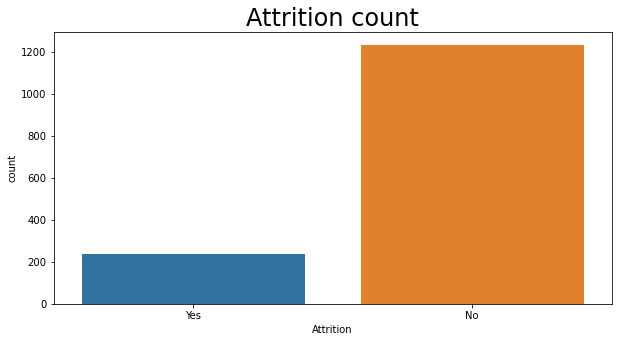

In [10]:
#count plot for categorical variable Attrition 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Attrition")
#plt.xticks(rotation=90)
plt.title("Attrition count", fontsize = 24)

Text(0.5, 1.0, 'Business Travel count')

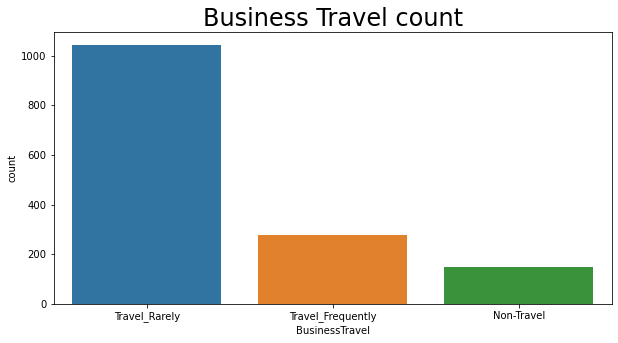

In [11]:
#count plot for categorical variable BusinessTravel
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="BusinessTravel")
#plt.xticks(rotation=90)
plt.title("Business Travel count", fontsize = 24)

Text(0.5, 1.0, 'Department count')

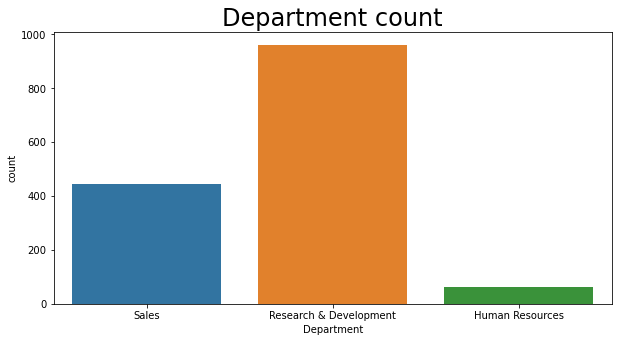

In [12]:
#count plot for categorical variable Department
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Department")
#plt.xticks(rotation=90)
plt.title("Department count", fontsize = 24)

Text(0.5, 1.0, 'Education Field count')

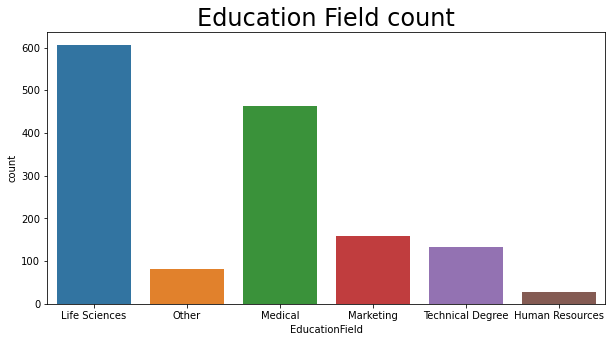

In [13]:
#count plot for categorical variable Education Field
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="EducationField")
#plt.xticks(rotation=90)
plt.title("Education Field count", fontsize = 24)

Text(0.5, 1.0, 'Gender count')

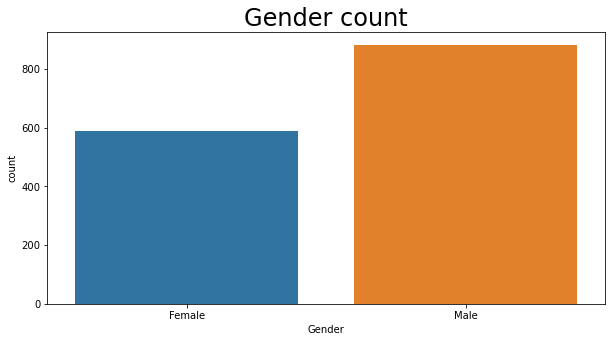

In [14]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="Gender")
#plt.xticks(rotation=90)
plt.title("Gender count", fontsize = 24)

Text(0.5, 1.0, 'Job Role count')

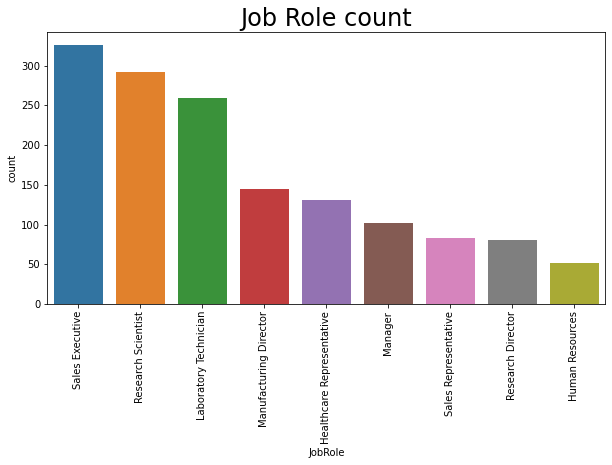

In [15]:
#count plot for categorical variable Job Role
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="JobRole")
plt.xticks(rotation=90)
plt.title("Job Role count", fontsize = 24)

Text(0.5, 1.0, 'Marital Status count')

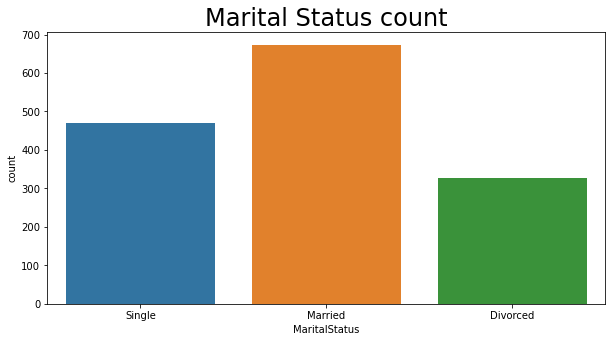

In [16]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="MaritalStatus")
#plt.xticks(rotation=90)
plt.title("Marital Status count", fontsize = 24)

Text(0.5, 1.0, 'Over Time count')

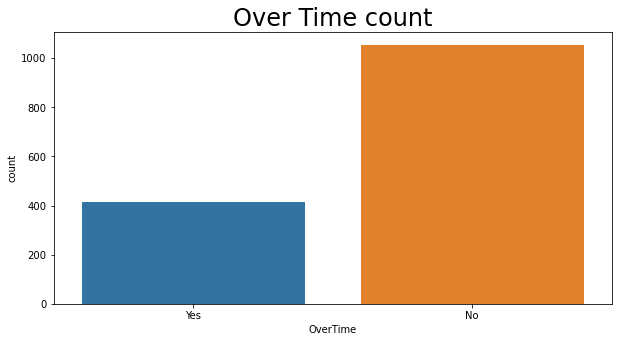

In [17]:
#count plot for categorical variable Gender
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=cat_hr, x="OverTime")
#plt.xticks(rotation=90)
plt.title("Over Time count", fontsize = 24)

In [18]:
hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### Bivariate analysis

In [19]:
qant_hr = hr[["DailyRate", "MonthlyIncome", "DistanceFromHome", "HourlyRate","MonthlyRate","PercentSalaryHike", "Attrition"]].copy()

In [20]:
qant_hr.head()

,DailyRate,MonthlyIncome,DistanceFromHome,HourlyRate,MonthlyRate,PercentSalaryHike,Attrition
0,1102,5993,1,94,19479,11,Yes
1,279,5130,8,61,24907,23,No
2,1373,2090,2,92,2396,15,Yes
3,1392,2909,3,56,23159,11,No
4,591,3468,2,40,16632,12,No


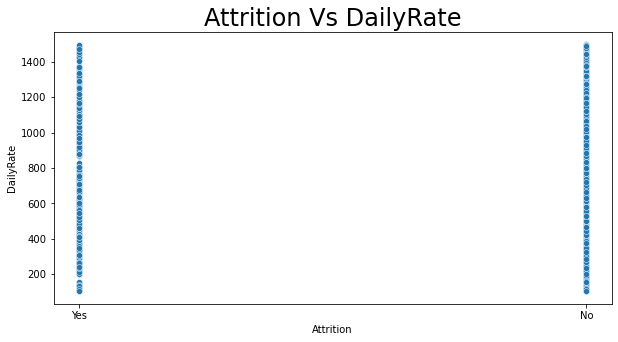

In [21]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs DailyRate", fontsize=24)
sns.scatterplot(x="Attrition", y="DailyRate", data=qant_hr)

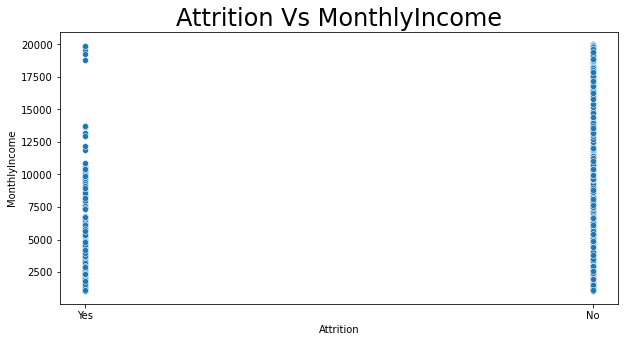

In [22]:
#plot to find relationship 
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs MonthlyIncome", fontsize=24)
sns.scatterplot(x="Attrition", y="MonthlyIncome", data=qant_hr)

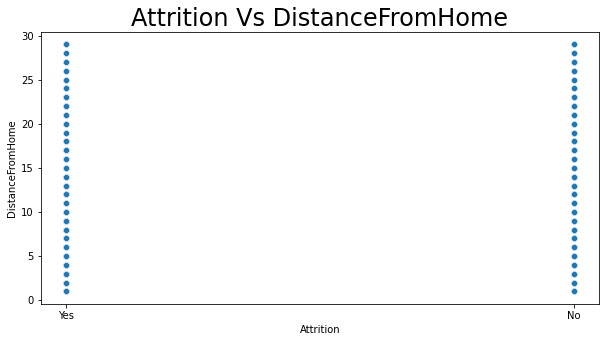

In [23]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs DistanceFromHome", fontsize=24)
sns.scatterplot(x="Attrition", y="DistanceFromHome", data=qant_hr)

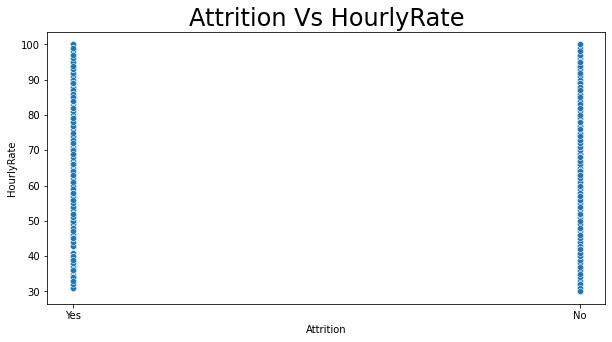

In [24]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs HourlyRate", fontsize=24)
sns.scatterplot(x="Attrition", y="HourlyRate", data=qant_hr)

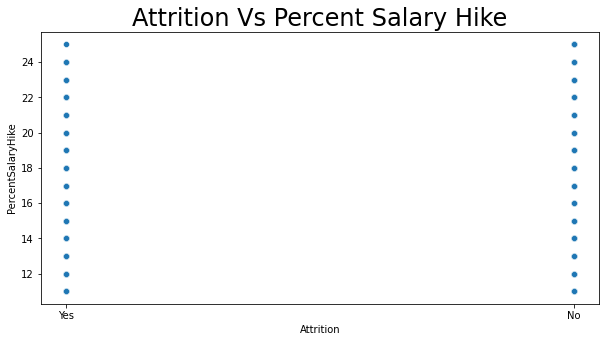

In [25]:
#plot to find relationship.
fig_size = (10,5)
fig, ax = plt.subplots(figsize = fig_size)
plt.title("Attrition Vs Percent Salary Hike", fontsize=24)
sns.scatterplot(x="Attrition", y="PercentSalaryHike", data=qant_hr)

In [26]:
quali_hr = hr[['Age', 'Attrition', 'Education','EmployeeCount' ,
       'EmployeeNumber', 'EnvironmentSatisfaction','JobInvolvement', 'JobLevel',  'JobSatisfaction','NumCompaniesWorked',
       'PerformanceRating','RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager']].copy()

In [27]:
quali_hr.head()

,Age,Attrition,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,NumCompaniesWorked,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,2,1,1,2,3,2,4,8,...,1,80,0,8,0,1,6,4,0,5
1,49,No,1,1,2,3,2,2,2,1,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,2,1,4,4,2,1,3,6,...,2,80,0,7,3,3,0,0,0,0
3,33,No,4,1,5,4,3,1,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,No,1,1,7,1,3,1,2,9,...,4,80,1,6,3,3,2,2,2,2


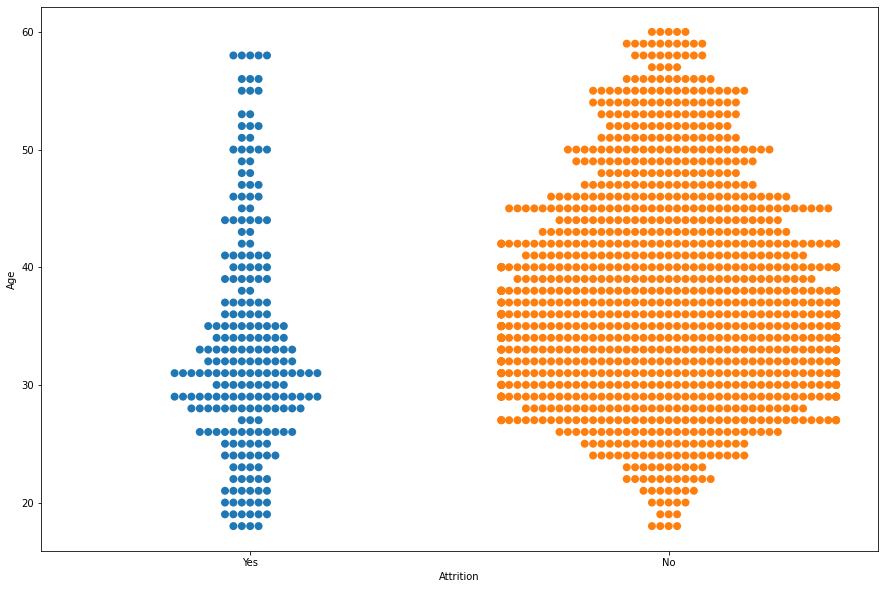

In [28]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x="Attrition", y="Age", data=quali_hr, size=8)
plt.show()

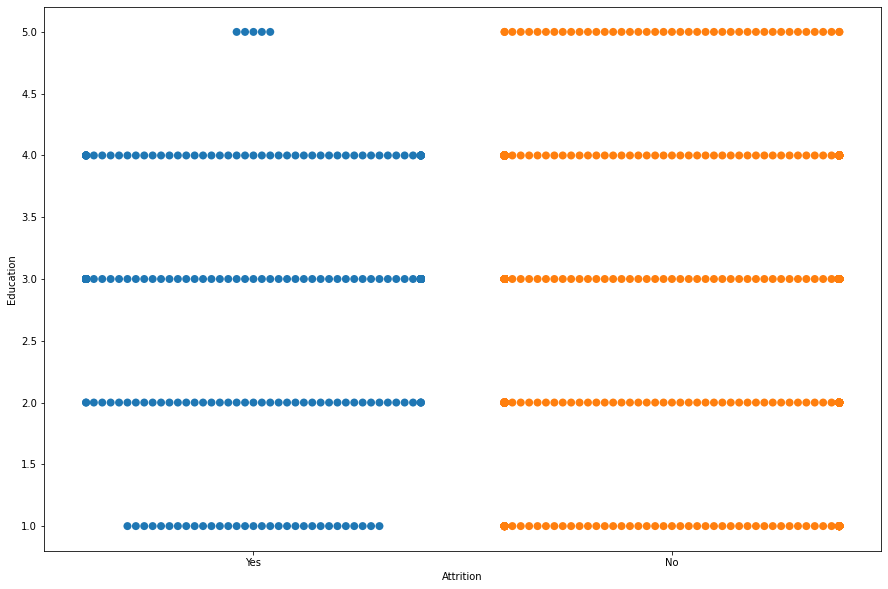

In [29]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x="Attrition", y="Education", data=quali_hr, size=8)
plt.show()

In [ ]:
fig_size = (15,10)
fig, ax = plt.subplots(figsize = fig_size)
sns.swarmplot(x="Attrition", y= "EmployeeNumber", data=quali_hr, size=8)
plt.show()

##### group analysis

In [ ]:
hr.columns

#### Label Encoding

In [ ]:
cat_hr.columns

In [ ]:
cat = ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

# import the labelencoder
from sklearn.preprocessing import LabelEncoder

# initialize Labelencoder
LE = LabelEncoder()

for val in cat:
    cat_hr[val] = LE.fit_transform(cat_hr[val])
    

In [ ]:
cat_hr

In [ ]:
for val in cat:
    print(cat_hr[val].unique())

In [ ]:
for val in cat:
    hr = hr.drop(val, axis=1)

In [ ]:
hr

In [ ]:
cat_hr

In [ ]:
new_hr = pd.concat([hr,cat_hr], axis=1, join="inner")

In [ ]:
new_hr

In [ ]:
new_hr.dtypes

### Multivariate analysis

In [ ]:
sns.catplot(x="Education", y="JobLevel", hue="Attrition", kind="violin", split=True, data=new_hr)

In [ ]:
sns.catplot(x="JobSatisfaction", y="JobInvolvement", hue="Attrition", kind="violin", split=True, data=new_hr)

In [ ]:
sns.catplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", kind="point", split=True, data=new_hr)

In [ ]:
sns.catplot(x="PerformanceRating", y="MonthlyIncome", hue="Attrition", kind="bar", data=new_hr)

In [ ]:
sns.catplot(x="RelationshipSatisfaction", y="TotalWorkingYears", hue="Attrition", kind="point", split=True, data=new_hr)

In [ ]:
sns.catplot(x="YearsInCurrentRole", y="YearsSinceLastPromotion", hue="Attrition", kind="bar", data=new_hr, height=10, aspect=12/10)
plt.show()

In [ ]:
sns.catplot(x="StandardHours", y="HourlyRate", hue="Attrition", kind="point", split=True, data=new_hr)

#### grouping

In [ ]:
new_hr.columns

In [ ]:
new =['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'Over18', 'OverTime']

In [ ]:
for val in new:
    print(new_hr.groupby("Attrition")[val].median())
    print("\n")

In [ ]:
new_hr.describe()

In [ ]:
correlation = new_hr.corr()
plt.figure(figsize = [25,15])
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matric HR Attrition")
plt.show()

In [ ]:
#Arrange feature according to correlation to target variables.
plt.figure(figsize=(22,7))
new_hr.corr()["Attrition"].sort_values(ascending = False).drop(["Attrition"]).plot(kind = "bar", color = "r")
plt.xlabel("Feature", fontsize = 15)
plt.ylabel("column with target names", fontsize = 15)
plt.title("correlation", fontsize=18)
plt.show()

In [ ]:
correlation["Attrition"].sort_values(ascending = False)

#### dropping column

In [ ]:
dictdata = {"column_name": ["BusinessTravel","EmployeeCount","StandardHours","Over18"],
            "Correlation _with_target":[0.000074, "NaN", "NaN", "NaN"],
            
           }
drop_df = pd.DataFrame(dictdata)

In [ ]:
drop_df

In [ ]:
drop_col = ["BusinessTravel","EmployeeCount","StandardHours","Over18"]
for val in drop_col:
    new_hr = new_hr.drop(val, axis=1)

In [ ]:
new_hr

# Checking For Skewness and Removal

### Normal Distribution Check

In [ ]:
qant_hr.columns

In [ ]:
quant_column = ['DailyRate', 'MonthlyIncome', 'DistanceFromHome', 'HourlyRate',
       'MonthlyRate', 'PercentSalaryHike']

In [ ]:
for val in quant_column:
    sns.distplot(qant_hr[val], kde=True)
    plt.show()

In [ ]:
qant_hr = qant_hr.drop("Attrition", axis = 1)

In [ ]:
qant_hr.skew()

In [ ]:
from scipy.stats import boxcox
qant_hr["MonthlyIncome"] = boxcox(qant_hr["MonthlyIncome"],0)

In [ ]:
qant_hr["MonthlyIncome"].plot.hist()

In [ ]:
qant_hr.skew()

In [ ]:
qant_hr["DailyRate"] = boxcox(qant_hr["DailyRate"],0)

In [ ]:
qant_hr["DailyRate"].plot.hist()

In [ ]:
qant_hr.skew()

In [ ]:
qant_hr["MonthlyRate"] = boxcox(qant_hr["MonthlyRate"],0)
qant_hr["PercentSalaryHike"] = boxcox(qant_hr["PercentSalaryHike"],0)

In [ ]:
qant_hr.skew()

In [ ]:
for val in quant_column:
    sns.distplot(qant_hr[val], kde=True)
    plt.show()

In [ ]:
#import power_transform
from sklearn.preprocessing import power_transform

num_hr = power_transform(qant_hr)

num_hr = pd.DataFrame(num_hr, columns =qant_hr.columns)

In [ ]:
num_hr

In [ ]:
num_hr.skew()

In [ ]:
for val in quant_column:
    sns.distplot(num_hr[val], kde=True)
    plt.show()

In [ ]:
for val in quant_column:
    new_hr = new_hr.drop(val, axis=1)

In [ ]:
new_hr

In [ ]:
new_hr.columns

In [ ]:
final_hr = pd.concat([new_hr,num_hr], axis=1, join="inner")

In [ ]:
final_hr.isnull().sum()

In [174]:
final_hr.dtypes

Age                           int64
Education                     int64
EmployeeNumber                int64
EnvironmentSatisfaction       int64
JobInvolvement                int64
JobLevel                      int64
JobSatisfaction               int64
NumCompaniesWorked            int64
PerformanceRating             int64
RelationshipSatisfaction      int64
StockOptionLevel              int64
TotalWorkingYears             int64
TrainingTimesLastYear         int64
WorkLifeBalance               int64
YearsAtCompany                int64
YearsInCurrentRole            int64
YearsSinceLastPromotion       int64
YearsWithCurrManager          int64
Attrition                     int32
Department                    int32
EducationField                int32
Gender                        int32
JobRole                       int32
MaritalStatus                 int32
OverTime                      int32
DailyRate                   float64
MonthlyIncome               float64
DistanceFromHome            

# checking for outlier and removal

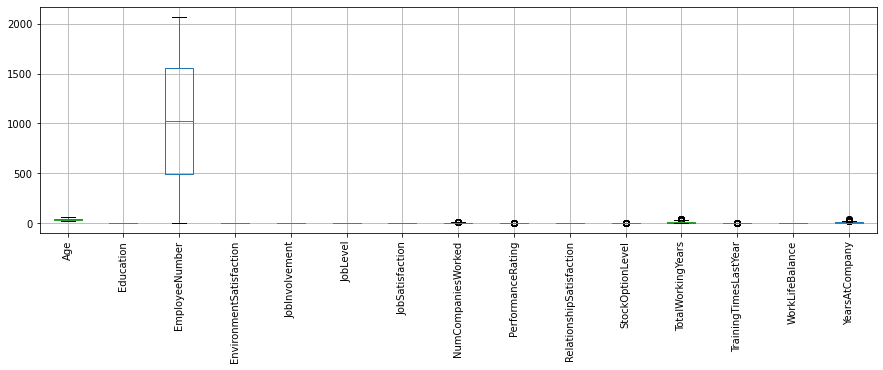

In [175]:
final_hr.iloc[:,0:15].boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

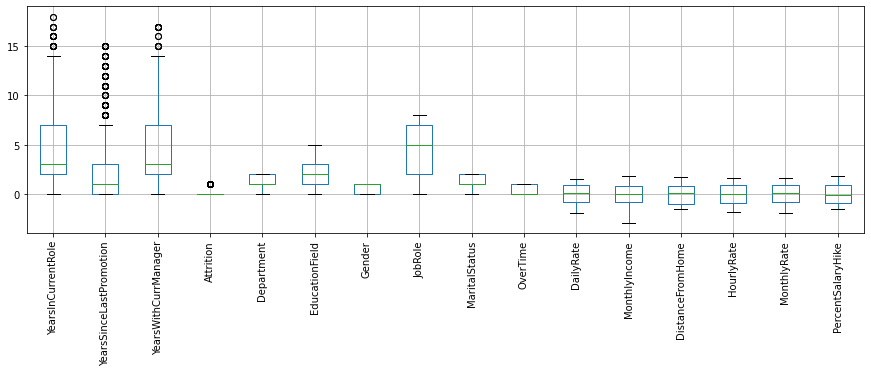

In [176]:
final_hr.iloc[:,15:].boxplot(figsize=[15,5])
plt.subplots_adjust(bottom=0.25)
plt.xticks(rotation=90)
plt.show()

In [177]:
#removing the outliers
from scipy.stats import zscore
z= np.abs(zscore(final_hr))


In [178]:
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([17, 16, 14, 16, 15, 16, 11, 11, 14, 16, 15, 16, 17, 11, 14, 16, 17,
       16, 11, 17, 14, 15, 16, 15, 17, 14, 16, 11, 14, 15, 16, 16, 17, 11,
       14, 14, 16, 16, 11, 15, 14, 14, 16, 14, 17, 16, 14, 11, 14, 16, 17,
       11, 17, 14, 16, 

In [179]:
final_hr = final_hr[(z<3).all(axis=1)]

In [180]:
final_hr.shape

(1387, 31)

#### Percentage data loss:

In [181]:
loss_percent = (1470-1387)/1470*100
print(loss_percent)

5.646258503401361


# Splitting the independent and dependant variables

In [182]:

x = final_hr.drop("Attrition", axis =1)
y = final_hr["Attrition"]

In [183]:
print(x.shape)
print(y.shape)

(1387, 30)
(1387,)


In [184]:
#scaling standardize the model thus the prediction come out with accuracy
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

x =scale.fit_transform(x)
#scaled 

In [185]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
maxAccu = 0
maxRS = 0
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predf = LR.predict(x_test)
    acc = accuracy_score(y_test, predf)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ", maxAccu, " on Random State ", maxRS)

Best accuracy is:  0.920863309352518  on Random State  431


# Split test/train split

In [216]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .30, random_state = 431)

In [217]:
x_test.shape

(417, 30)

In [218]:
y_test.shape

(417,)

In [219]:
x_train.shape

(970, 30)

In [220]:
y_train.shape

(970,)

# Finding the best algorithm

In [221]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.920863309352518
[[360   7]
 [ 26  24]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       367
           1       0.77      0.48      0.59        50

    accuracy                           0.92       417
   macro avg       0.85      0.73      0.77       417
weighted avg       0.91      0.92      0.91       417



In [222]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

0.7649880095923262
[[301  66]
 [ 32  18]]
              precision    recall  f1-score   support

           0       0.90      0.82      0.86       367
           1       0.21      0.36      0.27        50

    accuracy                           0.76       417
   macro avg       0.56      0.59      0.56       417
weighted avg       0.82      0.76      0.79       417



In [223]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

0.894484412470024
[[365   2]
 [ 42   8]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       367
           1       0.80      0.16      0.27        50

    accuracy                           0.89       417
   macro avg       0.85      0.58      0.60       417
weighted avg       0.89      0.89      0.86       417



In [224]:
from sklearn.model_selection import cross_val_score

lr_scr = cross_val_score(LR, x, y, cv = 10)
print("the cross validation score of Logisting regression model :", lr_scr.mean())

the cross validation score of Logisting regression model : 0.8759931185486394


In [225]:
from sklearn.model_selection import cross_val_score

dt_scr = cross_val_score(dt, x, y, cv = 10)
print("the cross validation score of Decision tree model :", dt_scr.mean())

the cross validation score of Decision tree model : 0.7859034511521218


In [226]:
from sklearn.model_selection import cross_val_score

rf_scr = cross_val_score(rf, x, y, cv = 10)
print("the cross validation score of random forest model :", rf_scr.mean())

the cross validation score of random forest model : 0.8521999791471171


In [227]:
diff = round((accuracy_score(y_test, predlr))*100) - round((lr_scr.mean())*100)
print("The difference forLogestic Regression is: " , diff )

The difference forLogestic Regression is:  4.0


In [231]:
diff = round((accuracy_score(y_test, preddt))*100) - round((dt_scr.mean())*100)
print("The difference for Decision Tree is: " , diff )

The difference for Decision Tree is:  -3.0


In [229]:
diff = round((accuracy_score(y_test, predrf))*100) - round((rf_scr.mean())*100)
print("The difference for Random Rorest is: " , diff )

The difference for Random Rorest is:  4.0


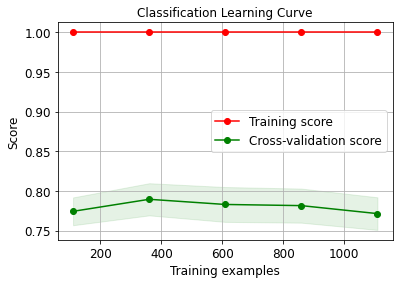

In [232]:
import scikitplot as skplt
skplt.estimators.plot_learning_curve(dt, x, y,
                                     cv=5, shuffle=True, scoring="accuracy",
                                     n_jobs=-1, figsize=(6,4), title_fontsize="large", text_fontsize="large",
                                     title="Classification Learning Curve");

# Hyper Parameter tuning

In [233]:
from sklearn.model_selection import GridSearchCV

In [234]:
#creating parameters list to pass in Grid SearchCV

parameters = {'max_depth': np.arange(2,15),
              "criterion": ["gini","entropy"]
    
}

In [235]:
GCV = GridSearchCV(DecisionTreeClassifier(), parameters, cv=5)

In [236]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [237]:
GCV.best_params_
#printing the best parameter found by GridSearchCV

{'criterion': 'entropy', 'max_depth': 3}

In [238]:
GCV_pred = GCV.best_estimator_.predict(x_test)

In [239]:
accuracy_score(y_test, GCV_pred)

0.8729016786570744

# Visuvalizatin of decision tree classifier

In [240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [241]:
final_hr.columns

Index(['Age', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'NumCompaniesWorked',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Department', 'EducationField',
       'Gender', 'JobRole', 'MaritalStatus', 'OverTime', 'DailyRate',
       'MonthlyIncome', 'DistanceFromHome', 'HourlyRate', 'MonthlyRate',
       'PercentSalaryHike'],
      dtype='object')

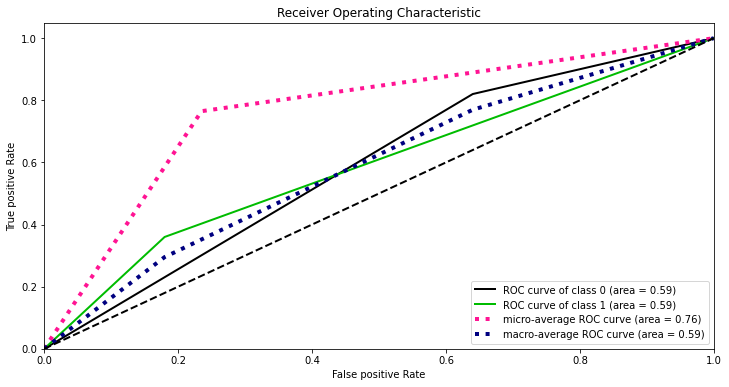

In [243]:
from sklearn.metrics import roc_curve, auc

test_prob = dt.predict_proba(x_test)

skplt.metrics.plot_roc_curve(y_test, test_prob,
                       title="Digits ROC Curve", figsize=(12,6));

plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc = "lower right")
plt.show()

In [245]:
import joblib
joblib.dump(GCV.best_estimator_, "HRattritionfinal.pkl")

['HRattritionfinal.pkl']

In [246]:
joblib.dump(GCV.best_estimator_, "HRattritionfinal.obj")

['HRattritionfinal.obj']

In [248]:
import numpy as np
a = np.array(y_test)
predicted = np.array(GCV_pred)
df_con = pd.DataFrame({"orginal":a, "predicted":predicted}, index = range(len(a)))
df_con

,orginal,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0
...,...,...
412,0,0
413,0,0
414,0,1
415,1,0
